In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('CIPLA.csv')
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data = data.dropna()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4660 entries, 0 to 4693
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4660 non-null   datetime64[ns]
 1   Open    4660 non-null   float64       
 2   High    4660 non-null   float64       
 3   Low     4660 non-null   float64       
 4   Close   4660 non-null   float64       
 5   Volume  4660 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 254.8 KB


In [4]:
data.head(10)

,Date,Open,High,Low,Close,Volume
0,2005-01-03,128.000000,128.800003,126.400002,127.500000,413807.0
1,2005-01-04,128.660004,128.800003,126.199997,127.059998,474117.0
2,2005-01-05,127.000000,127.019997,114.800003,120.459999,769930.0
3,2005-01-06,122.000000,122.040001,116.000000,117.400002,1237895.0
4,2005-01-07,117.239998,118.779999,116.019997,116.639999,1145887.0
5,2005-01-10,116.000000,119.000000,111.800003,112.680000,956135.0
6,2005-01-11,112.760002,113.599998,106.019997,107.160004,1658220.0
7,2005-01-12,108.800003,109.199997,98.199997,101.019997,2455915.0
8,2005-01-13,102.800003,107.559998,102.400002,105.739998,2382132.0
9,2005-01-14,106.400002,108.739998,105.260002,106.279999,1249067.0


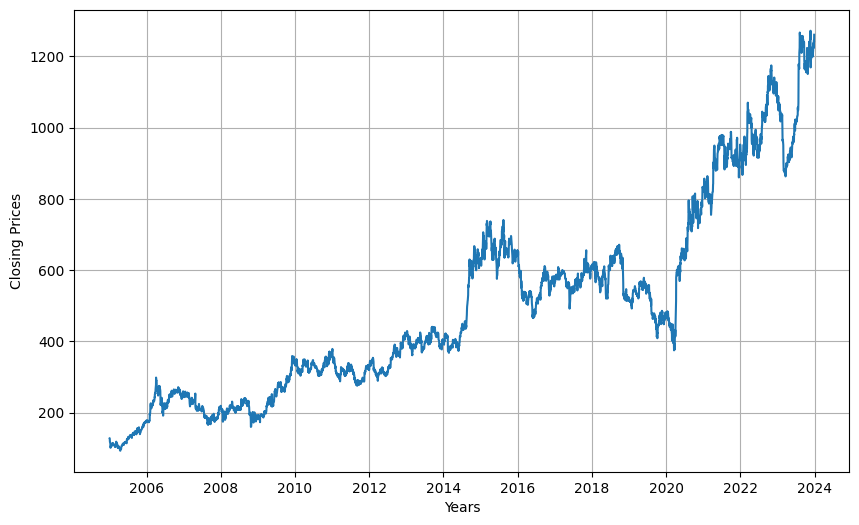

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data['Date'],data['Close'])
plt.show()

In [6]:
len(data)

4660

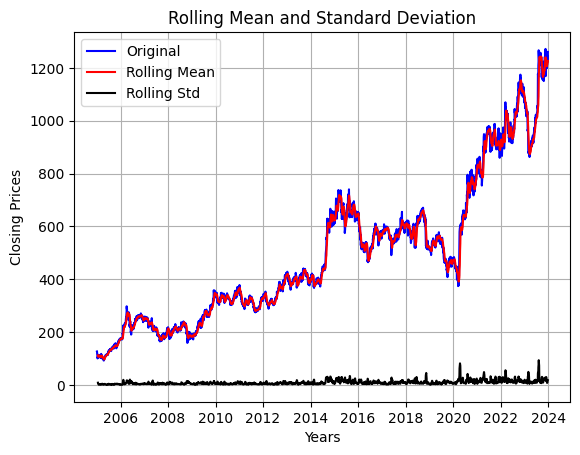

Results of dickey fuller test
Test Statistics                   0.333903
p-value                           0.978848
No. of lags used                  1.000000
Number of observations used    4658.000000
critical value (1%)              -3.431755
critical value (5%)              -2.862161
critical value (10%)             -2.567100
dtype: float64


In [7]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    date = data[:].Date
    plt.grid(True)
    plt.xlabel('Years')
    plt.ylabel('Closing Prices')
    plt.plot(date,timeseries, color='blue',label='Original')
    plt.plot(date,rolmean, color='red', label='Rolling Mean')
    plt.plot(date,rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data['Close'])

In [8]:
returns = data['Close'].pct_change().dropna()
returns

1      -0.003451
2      -0.051944
3      -0.025403
4      -0.006474
5      -0.033951
          ...   
4689   -0.009840
4690    0.010470
4691    0.008095
4692   -0.004738
4693    0.016903
Name: Close, Length: 4659, dtype: float64

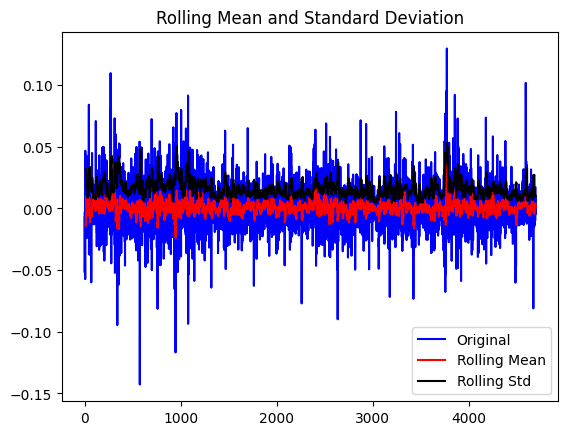

Results of dickey fuller test
Test Statistics                 -68.756337
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    4658.000000
critical value (1%)              -3.431755
critical value (5%)              -2.862161
critical value (10%)             -2.567100
dtype: float64


In [9]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(returns)



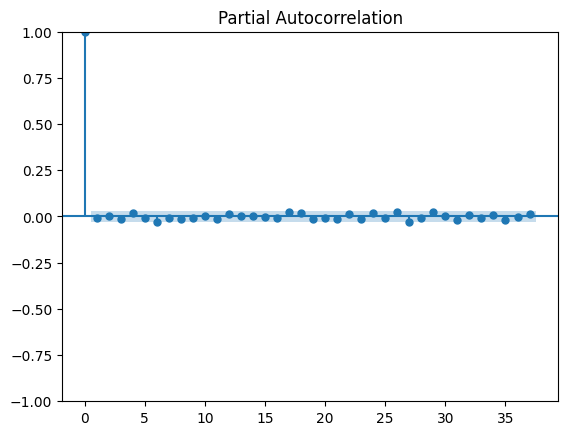

In [10]:
plot_pacf(returns, method = 'ywm')
plt.show()

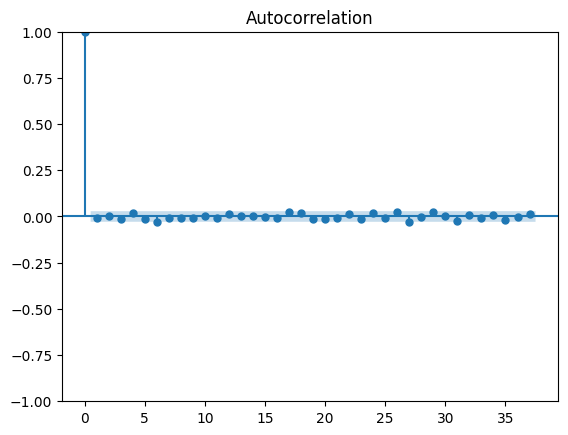

In [11]:
plot_acf(returns)
plt.show()

In [12]:
row = int(len(data)*0.9)
train_data = list(data[:row]['Close'])
test_data = list(data[row:]['Close'])
print(train_data[:10] ,len(train_data))
print(test_data[:10], len(test_data))

[127.5, 127.059998, 120.459999, 117.400002, 116.639999, 112.68, 107.160004, 101.019997, 105.739998, 106.279999] 4194
[921.400024, 910.5, 902.25, 895.450012, 882.700012, 866.900024, 891.700012, 904.099976, 927.849976, 932.150024] 466


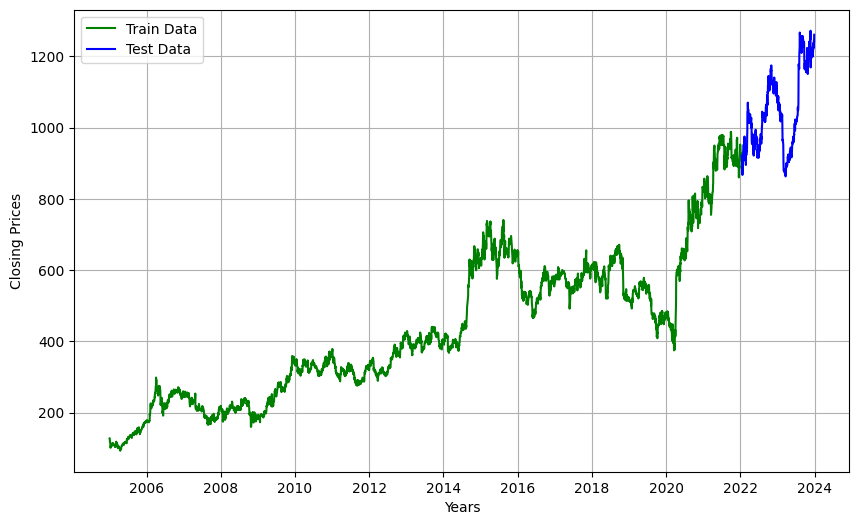

In [13]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Years')
plt.ylabel('Closing Prices')
plt.plot(data[0:row]['Date'],data[0:row]['Close'], 'green', label='Train Data')
plt.plot(data[row:]['Date'],data[row:]['Close'], 'blue', label='Test Data')
plt.legend()

In [14]:
model_predictions = []
n_test_obser = len(test_data)
print(train_data[:10])
print(test_data[:10])

[127.5, 127.059998, 120.459999, 117.400002, 116.639999, 112.68, 107.160004, 101.019997, 105.739998, 106.279999]
[921.400024, 910.5, 902.25, 895.450012, 882.700012, 866.900024, 891.700012, 904.099976, 927.849976, 932.150024]


In [20]:
for i in range(n_test_obser):
    model = ARIMA(train_data, order=(1, 1, 1))  #p,d,q
    
    model_fit = model.fit()
    output = model_fit.forecast()
    print(output)
    model_predictions.append(output)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)

[1259.15046874]
[947.00818284]
[907.30706479]
[903.63280802]
[895.52200484]
[883.34658581]
[867.53937795]
[890.29076528]
[903.79981447]
[926.740788]
[932.20884204]
[944.11293605]
[945.33748449]
[951.15476702]
[952.34764546]
[946.20327897]
[934.07985577]
[947.72300376]
[967.17374269]
[974.50374834]
[958.89467194]
[923.26498973]
[931.65069581]
[928.30102438]
[909.17996632]
[905.86526659]
[912.77791628]
[915.70050539]
[895.81496312]
[920.04631752]
[925.24161986]
[923.62660365]
[933.91511848]
[932.24188838]
[940.0293101]
[967.10979206]
[980.96740292]
[986.61631762]
[1041.73867032]
[1048.85946385]
[1068.62787593]
[1056.76440889]
[1048.48823355]
[1049.85366236]
[1033.19945819]
[1015.48307579]
[1028.28502304]
[1014.30370165]
[1017.86404585]
[1037.96142575]
[1032.57939787]
[1019.00412741]
[1014.99042078]
[1027.18901593]
[1021.75686645]
[1027.95193568]
[1036.61151456]
[1012.91381806]
[1022.67406281]
[1027.32949887]
[1016.81946927]
[1026.46153105]
[1000.51639086]
[1010.85177581]
[999.1247309]
[9

In [16]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4659
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -16906.957
Date:                Wed, 29 May 2024   AIC                          33815.914
Time:                        11:06:14   BIC                          33822.360
Sample:                             0   HQIC                         33818.181
                               - 4659                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        83.2166      0.609    136.590      0.000      82.022      84.411
Ljung-Box (L1) (Q):                  15.25   Jarque-Bera (JB):             38164.66
Prob(Q):                              0.00   Pr

In [17]:
len(model_predictions)

466

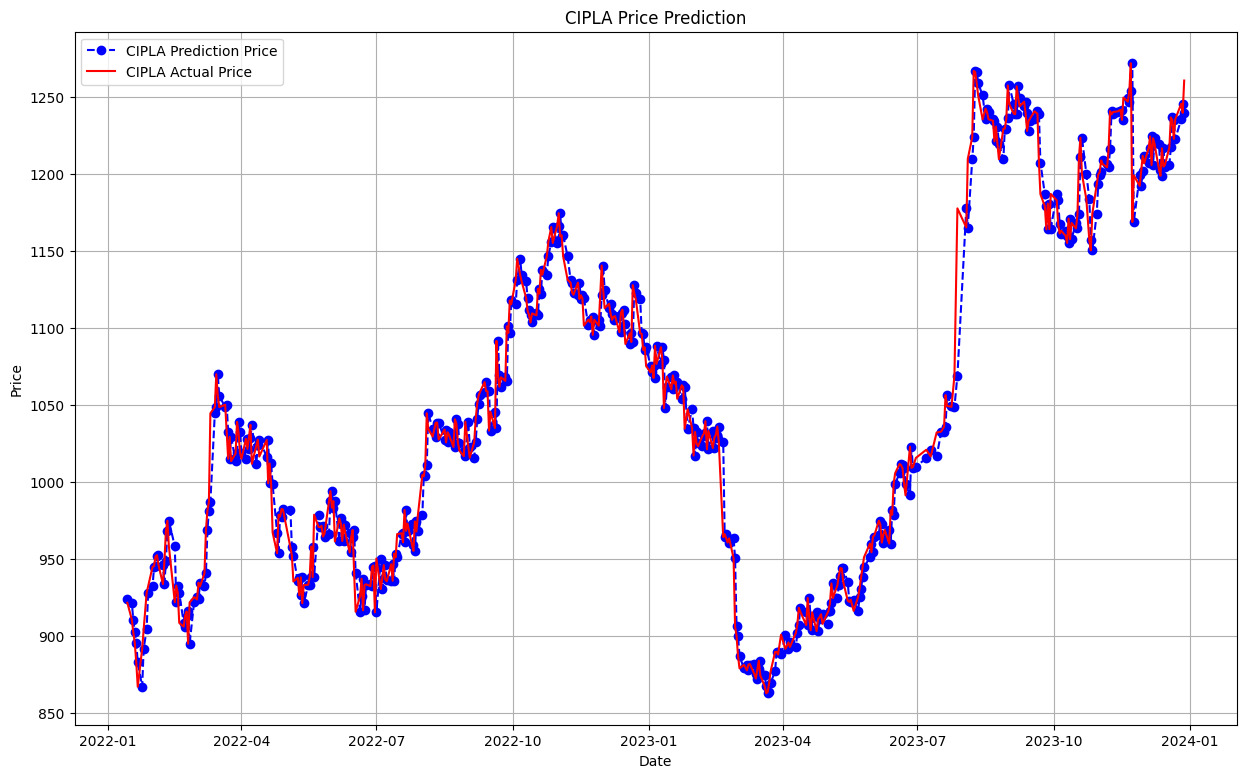

In [18]:
plt.figure(figsize=(15,9))
plt.grid(True)

date_range = data[row:].Date
plt.plot(date_range, model_predictions, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'CIPLA Prediction Price')
plt.plot(date_range, test_data, color = 'red', label = 'CIPLA Actual Price')

plt.title('CIPLA Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [19]:
mape = np.mean(np.abs(np.array(model_predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: ',(mape))
print('Accuracy: ', (100-(mape*100)))

MAPE:  0.12156382428489616
Accuracy:  87.84361757151038
